# Saturation/Equilibrium vapor pressure over water and ice


<br>

In chapter 3.3 we derived the Clausius-Clapeyron equation: We found that for maintaining the equilibrium during a temperature change the, free energies (Gibbs function) of both phases have to change at the same rate. By substituting the first law of thermodynamics in enthalpy form, we obtained:
$$\frac{de_s}{dT} = \frac{\Delta \phi}{\Delta v}$$
Here, $e_s = p_{H_20}$ is the saturation/equilibrium pressure, $T$ the temperature, $\Delta \phi$ the change in the molar entropy and $\Delta v$ the change in the molar volume. This differential equation can be solved for an ideal gas by integration (up to integration constants). Consequently, there exists several forms (of different accuracy) containing slightly different constants. <br><br>


We use the formulation from ECMWF (by Simmons et al., 1999: https://www.ecmwf.int/sites/default/files/elibrary/1998/12287-stratospheric-water-vapour-and-tropical-tropopause-temperatures-ecmwf-analyses-and-multi-year.pdf). Originally, they used the saturation over ice for temperatures less than 250 K and a quadratic interpolation between saturation over ice and over liquid water for temperatures between 250 K and 273 K. We want to plot both curves (saturation vapor pressure over ice/water) separately, for which we use the following form of the so called Tetens formula (which is slightly more accurate than the Magnus equation in the book, eq. 3.32):

In [4]:
saturation_water = function(T, p) {
    #@param: T temperature in K
    #@param: p pressure in Pa
    #@return: e_s saturation vapor pressure over water
    es0 <- 611.21
    T0 <- 273.15
    a3l <- 17.502
    a4l <- 32.19
    return(es0 * exp( a3l * (T - T0) / (T - a4l) ))
}



saturation_ice = function(T, p) {
    #@param: T temperature in K
    #@param: p pressure in Pa
    #@return: e_i saturation vapor pressure over ice
    es0 <- 611.21
    T0 <- 273.15
    a3i <- 22.587
    a4i <- -0.7
    return(es0 * exp( a3i * (T - T0) / (T - a4i) ))
}


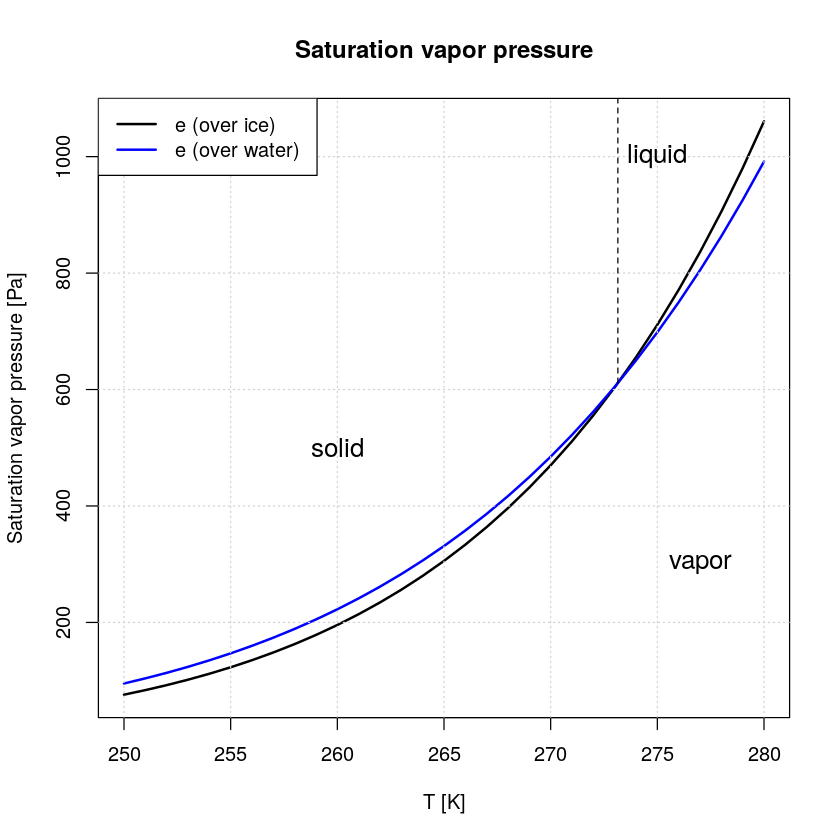

In [5]:
### plotting ###
temp2 = seq(250,280) #K
p0 = 100000 #Pa
T0 = 273.15 #K

plot(temp2,saturation_ice(temp2,p0),type='l',xlab='T [K]', ylab = 'Saturation vapor pressure [Pa]',
     main='Saturation vapor pressure',lwd=2)
points(temp2,saturation_water(temp2,p0),type='l',col=4,lwd=2)
grid()
legend('topleft',legend=c('e (over ice)','e (over water)'),col=c(1,4),lwd=c(2,2),lty=c(1,1))
segments(T0,saturation_water(T0,p0),T0,1500,lty=2)
text(260,500,"solid",cex=1.3)
text(277,300,"vapor",cex=1.3)
text(275,1000,"liquid",cex=1.3)

So, we have reproduced Fig. 3.2 from the book. <br><br>

We want to take a closer look at the difference between these curves and calculate the temperature for which the difference is maximal:

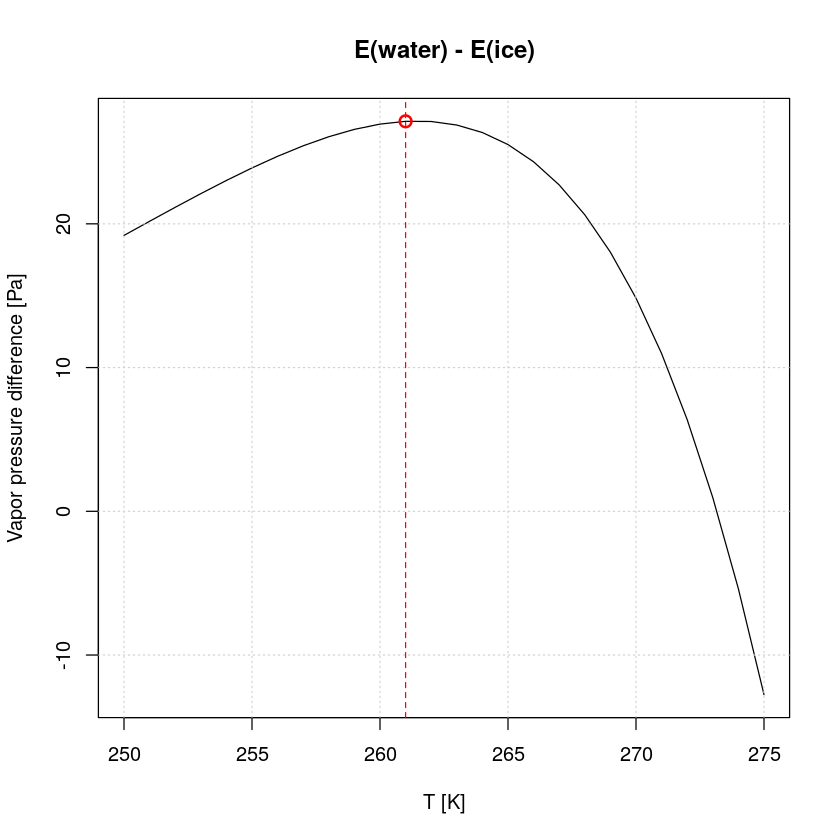

In [10]:
diff=saturation_water(temp2,p0)-saturation_ice(temp2,p0)
plot(temp2,diff,type='l',main='E(water) - E(ice)',xlab='T [K]', ylab = 'Vapor pressure difference [Pa]')
grid()

#maximal difference (determined numerically)
points(temp2[which(diff==max(diff))],max(diff),col=2,lwd=2,cex=1.3)
abline(v=temp2[which(diff==max(diff))],col=2,lty=2)